
*This notebook reproduces results of the work published in [PhysRevB.107.224507 (2023)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.107.224507).*

# A single-site model of a spin-split superconductor coupled to a magnetic impurity. 

Hamiltonian describing a single-site model coupled to a magnetic impurity reads 

$$ H = \Delta (c^\dagger_\uparrow c^\dagger_\downarrow + \text{h.c.} ) + J \vec{S} \cdot \vec{s} + h c^{\dagger}_s \sigma^z_{ss'} c^{}_{s'} + \vec{B} \cdot \vec{S}\,,$$

where $\vec{S}$ describes an impurity with spin-$1/2$, and $c^\dagger_\sigma\,, (c^{ }_\sigma)$ is a creation (annihilation) operator for electrons on a single fermionic site. $\vec{h} = h e_z$ is a spin-splitting field induced by a proximity of a superconductor to a ferromagnetic insulator. Below, we obtain a spectrum of this Hamiltonian and spectral function of the lowest in energy single-particle ground-state excitations. 



In [2]:
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt

In [4]:
#system parameters 
delta = 1.0
J = 0.3
h = 0.0
B = 0.0
theta = 0.
phi = 0.

#gamma is width in Lorentzian
gamma=0.001

N = 100

s0 = np.array([[1,0.],[0.,1.]])
s1 = np.array([[0.,1.],[1.,0.]])
s2 = np.array([[0,-1.j],[1.j,0.]])
s3 = np.array([[1,0.],[0.,-1.]])

c_up = np.zeros((8,8))
c_down = np.zeros((8,8))
c_up[4][0] = c_up[5][1] = c_up[2][6] = c_up[3][7] = 1.
c_down[6][0] = c_down[7][1] = 1.
c_down[2][4] = c_down[3][5] = -1.


In [6]:
#define Hamiltonian
def hamiltonian(delta,J,h,B,theta,phi):
    Bx = B*np.sin(theta)*np.sin(phi)
    By = B*np.sin(theta)*np.cos(phi)
    Bz = B*np.cos(theta)
    h0 = delta*np.kron(0.5*(s0+s3),s1) - h*np.kron(0.5*(s0-s3),s3)
    h1 = np.kron(h0,s0)+0.5*J*np.kron(0.5*(s0-s3),np.kron(s3,s3))\
    +J*np.kron(0.5*(s0-s3),np.array([[0, 0, 0, 0],[0, 0, 1,0],[0, 1, 0, 0],[0, 0, 0, 0]]))\
        +0.5*Bx*np.kron(s0,np.kron(s0,s1))\
        +0.5*By*np.kron(s0,np.kron(s0,s2))\
        +0.5*Bz*np.kron(s0,np.kron(s0,s3))
    return h1

def lorentzian(x, gamma, eps0):
    return (gamma/2*np.pi) * 1/((x-eps0)**2 + (gamma/2)**2)

def spectral_density_up(gamma,omega,eigenvecs,eigenvals):
    elements = []
    if B != 0.:
        for n in range(3):
            mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up),eigenvecs[0]))
            elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
    else:
        if J > J_critical or J ==0.:
            for n in range(3):
                mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up),eigenvecs[0]))
                elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
        else:
            for n in range(3):
                mat_el0 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up),eigenvecs[0]))
                elements.append(mat_el0**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
                mat_el1 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up),eigenvecs[1]))
                elements.append(mat_el1**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[1]))
    #print(elements)
    tot = np.sum(elements)    
    #print('degenerate GS with evec0 and evec1',eigenvals[0],' = ', eigenvals[1])
    return tot

def spectral_density_down(gamma,omega,eigenvecs,eigenvals):
    elements = []
    if B != 0.:
        for n in range(3):
            mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down),eigenvecs[0]))
            elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
    else:
        if J > J_critical or J ==0.:
            for n in range(3):
                mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down),eigenvecs[0]))
                elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
        else:
            for n in range(3):
                mat_el0 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down),eigenvecs[0]))
                elements.append(mat_el0**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
                mat_el1 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down),eigenvecs[1]))
                elements.append(mat_el1**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[1]))
    #print(elements)
    tot = np.sum(elements)    
    #print('degenerate GS with evec0 and evec1',eigenvals[0],' = ', eigenvals[1])
    return tot

In [7]:
def HOLEspectral_density_up(gamma,omega,eigenvecs,eigenvals):
    elements = []
    if B != 0.:
        for n in range(3):
            mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up.T),eigenvecs[0]))
            elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
    else:
        if J > J_critical or J==0.:
            for n in range(3):
                mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up.T),eigenvecs[0]))
                elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
        else:
            for n in range(3):
                mat_el0 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up.T),eigenvecs[0]))
                elements.append(mat_el0**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
                mat_el1 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_up.T),eigenvecs[1]))
                elements.append(mat_el1**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[1]))
    #print(elements)
    tot = np.sum(elements)    
    #print('degenerate GS with evec0 and evec1',eigenvals[0],' = ', eigenvals[1])
    return tot

def HOLEspectral_density_down(gamma,omega,eigenvecs,eigenvals):
    elements = []
    #if omega<1-h or omega>1+h:
    if B != 0.:
        for n in range(3):
            mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down.T),eigenvecs[0]))
            elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
    else:
        if J > J_critical or J ==0.:
            for n in range(3):
                mat_el = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down.T),eigenvecs[0]))
                elements.append(mat_el**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
        else:
            for n in range(3):
                mat_el0 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down.T),eigenvecs[0]))
                elements.append(mat_el0**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[0]))
                mat_el1 = np.abs(np.dot(np.dot(np.conj(eigenvecs[n]).T,c_down.T),eigenvecs[1]))
                elements.append(mat_el1**2*lorentzian(omega, gamma, eigenvals[n]-eigenvals[1]))
    #print(elements)
    tot = np.sum(elements)    
    #print('degenerate GS with evec0 and evec1',eigenvals[0],' = ', eigenvals[1])
    return tot

In [8]:
#parity function
ham = hamiltonian(delta,J,h,B,theta,phi)
eigenvals, eigenvecs = np.linalg.eigh(ham)
eigenvecs = np.transpose(eigenvecs)

np.set_printoptions(linewidth=200,precision=2)
#print(np.dot(np.transpose(eigenvecs),eigenvecs))

psi = []
for i in [0.0 ,2.0 ,0.5 ,-0.5 ]:
    for j in [0.5,-0.5]:
        psi.append([i,j])

def parity_function(eigenvecs):        
    parity_list = []        
    for evec in eigenvecs:
        particle_number = []
        for i in range(8):
            if evec[i] != 0:
                particle_number.append(np.abs(psi[i][0]))    
        parity = np.sum((1-(-1)**(2*np.array(particle_number)))) 
        #parity_list.append(np.heaviside(parity,0))
        if parity == 0.0:
            parity_list.append('blue')
        else:
            parity_list.append('darkorange')
    return parity_list   

In [10]:
evals_list1 = []
Jlist = np.arange(0,1,1/N)
parity_color1 = []
B = 0.

for j in Jlist:
    ham = hamiltonian(delta,0,0,B,0,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    parity_color1.append(parity_function(eigenvecs))
    evals_list1.append(eigenvals)

evals_list2 = []
h_list = np.arange(0,0.3,0.3/N)
parity_color2 = []
for h in h_list:
    ham = hamiltonian(delta,0,h,B,0,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    parity_color2.append(parity_function(eigenvecs))
    evals_list2.append(eigenvals)     

evals_list3 = []
parity_color3 = []
j_critlist = []
for J in Jlist:
    ham = hamiltonian(delta,J,0.3,B,0,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    parity_color3.append(parity_function(eigenvecs))
    evals_list3.append(eigenvals)
    if np.isclose(eigenvals[0],eigenvals[1],atol = 0.01,rtol=0.0001):
        j_critlist.append(J)
    #print('J  ',j,'  energies = ',eigenvals[0],eigenvals[1],eigenvals[2])       
J_critical = np.mean(np.array(j_critlist))        
print('J_critical =', J_critical)
    
evals_list4 = []
parity_color4 = []
b_list = np.arange(0,0.2,0.2/N)
for b in b_list:
    ham = hamiltonian(delta,1,h,b,0,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    parity_color4.append(parity_function(eigenvecs))
    evals_list4.append(eigenvals)     

evals_list5 = []
parity_color5 = []
theta_list = np.arange(0,np.pi,np.pi/N)
for theta in theta_list:
    ham = hamiltonian(delta,1,h,0.2,theta,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    parity_color5.append(parity_function(eigenvecs))
    evals_list5.append(eigenvals) 
   

J_critical = 0.31


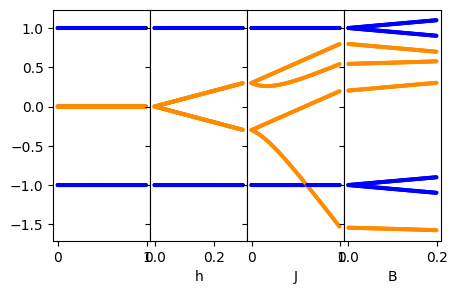

In [11]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True, figsize=(5, 3))

for i in range(N):
    ax1.scatter([Jlist[i]]*8,np.real(evals_list1)[i],c = parity_color1[i],s = 15,marker = '.')
    #ax1.set_title('between (x1, 0)')


for i in range(N):
    ax2.scatter([h_list[i]]*8,np.real(evals_list2)[i],c = parity_color2[i],s = 15,marker = '.')
    ax2.set_xlabel('h')

for i in range(N):
    ax3.scatter([Jlist[i]]*8,np.real(evals_list3)[i],c = parity_color3[i],s = 15,marker = '.')
    #ax3.axvline(x = J_critical,color = 'r',linewidth = 1.)
    #ax3.set_title('between (x1, 0)')
    ax3.set_xlabel('J')
    
for i in range(N):
    ax4.scatter([b_list[i]]*8,np.real(evals_list4)[i],c = parity_color4[i],s = 15,marker = '.')
    #ax3.set_title('between (x1, 0)')
    ax4.set_xlabel('B')    
plt.subplots_adjust(wspace = 0, hspace = 0)     





Energy spectrum as a function of exchange coupling J in the presence of finite h.


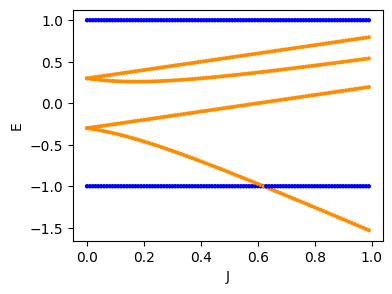

In [17]:
N = 100
delta = 1.0
J = 0.3
h = 0.3
B = 0.
theta = 0.
phi = 0.


evals_list = []
evecs_list = []
J_list = np.arange(0,1.,1./N)
parity_color = []
for J in J_list:
    ham = hamiltonian(delta,J,h,B,theta,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    parity_color.append(parity_function(eigenvecs))
    evals_list.append(eigenvals)  

fig = plt.figure(figsize=(4,3))
print('Energy spectrum as a function of exchange coupling J in the presence of finite h.')
for i in range(N):
    plt.scatter([Jlist[i]]*8,np.real(evals_list)[i],c = parity_color[i],s = 15,marker = '.')
    plt.xlabel('J')
    plt.ylabel('E')
plt.show()

## 2. Spectral properties of single-particle excitations above the ground state.

In [57]:
#Definition of spectral function A(omega,J) and polarization P(theta,J)

N = 100
delta = 1.0
J = 0.8
h = 0.3
B = 0.1
theta = 0.0
phi = 0.

ham = hamiltonian(delta,J,h,B,theta,phi)
eigenvals, eigenvecs = np.linalg.eigh(ham)
eigenvecs = np.transpose(eigenvecs)


spectral_up = []
spectral_down = []
omegalist = np.arange(0,1,1/N)
for omega in omegalist:
    spectral_up.append(spectral_density_up(gamma,omega,eigenvecs,eigenvals))
    spectral_down.append(spectral_density_down(gamma,omega,eigenvecs,eigenvals))
    

Hspectral_up = []
Hspectral_down = []
omegalist = np.arange(0,1,1/100)
for omega in omegalist:
    Hspectral_up.append(HOLEspectral_density_up(gamma,omega,eigenvecs,eigenvals))
    Hspectral_down.append(HOLEspectral_density_down(gamma,omega,eigenvecs,eigenvals))
    
  

In [58]:
B = 0.1
h = 0.3
delta = 1.
theta = 0.
N = 100
gamma=0.02

Jlist = np.arange(0,1,1/N)
omegalist = np.arange(0,1,1/N)
Jaxes, omegaaxes = np.meshgrid(Jlist, omegalist)


El_Spectral_up = []
El_Spectral_down = []

Hole_Spectral_up = []
Hole_Spectral_down = []

j_critlist = []
for J in Jlist:
    ham = hamiltonian(delta,J,h,B,theta,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    if B != 0.0:
        if np.isclose(eigenvals[0],eigenvals[1],atol = 0.01,rtol=0.0001):
            j_critlist.append(J)
    else:
        if np.isclose(eigenvals[0],eigenvals[2],atol = 0.01,rtol=0.0001):
            j_critlist.append(J)        

J_critical = np.mean(np.array(j_critlist))        
print(J_critical)

j_critlist = []
for J in Jlist:
    ham = hamiltonian(delta,J,h,B,theta,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    A_up = []
    A_down = []
    B_up = []
    B_down = []
    for omega in omegalist:
        A_up.append(spectral_density_up(gamma,omega,eigenvecs,eigenvals))
        A_down.append(spectral_density_down(gamma,omega,eigenvecs,eigenvals))
        B_up.append(HOLEspectral_density_up(gamma,1-omega,eigenvecs,eigenvals))
        B_down.append(HOLEspectral_density_down(gamma,1-omega,eigenvecs,eigenvals))
    El_Spectral_up.append(A_up)
    El_Spectral_down.append(A_down)
    Hole_Spectral_up.append(B_up)
    Hole_Spectral_down.append(B_down)




0.64


In [59]:
test_up = np.array(El_Spectral_up)
test_down = np.array(El_Spectral_down)

test_up_hole = np.array(Hole_Spectral_up)
test_down_hole = np.array(Hole_Spectral_down)

sum_array_el = test_up + test_down
sum_array_hole = test_up_hole + test_down_hole



norm_listel = [] 
norm_listhole = [] 

for i in range(N):
    norm_listel.append(test_up[i]/max(sum_array_el[i]))
    #print(max(sum_array_el[i]))
    norm_listhole.append(test_up_hole[i]/max(sum_array_hole[i]))  
    
norm_spinup = np.append(np.array(norm_listhole),np.array(norm_listel),axis = 1)

norm_listel = [] 
norm_listhole = [] 
for i in range(N):
    norm_listel.append(test_down[i]/max(sum_array_el[i]))
    norm_listhole.append(test_down_hole[i]/max(sum_array_hole[i]))


norm_spindown = np.append(np.array(norm_listhole),np.array(norm_listel),axis = 1)


The figure shows spin polarization of the YSR excitations (single-particle excitations above the ground state in this system). As exchange coupling increases the system undergoes phase transition that in the presence of exchange field $h$ and an external magnetic field $B$ gives rise to the splitting of the YSR states in the strong coupling regime of $J$. 

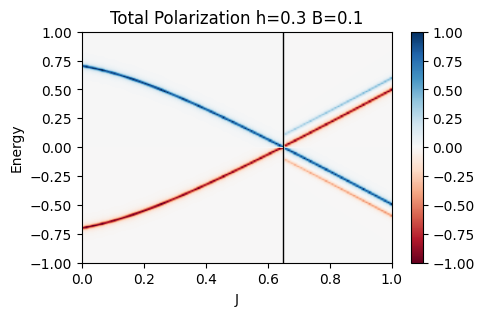

In [60]:
fig = plt.figure(figsize=(5,3))
plot = plt.imshow((norm_spinup-norm_spindown).T,extent=(0,1,-1,1),origin='lower',aspect = 'auto',interpolation='bilinear',cmap='RdBu')
plt.axvline(x = J_critical+0.01, color = 'black', linewidth = 1.)
plt.xlabel('J')
plt.ylabel('Energy')
plt.title('Total Polarization h='+str(h)+' B='+str(B))
plot.set_clim(vmin = -1.,vmax = 1.)
plt.colorbar()
plt.show()  

#### What happens when we rotate the magnetic field $B$? 

In [39]:
delta = 1.0
h = 0.3
B = 0.1
theta = np.pi/3
phi = 0.


evals_list = []
evecs_list = []
Jlist = np.arange(0,1,1/N)
parity_color = []
j_critlist = []
for j in Jlist:
    ham = hamiltonian(delta,j,h,B,theta,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    parity_color.append(parity_function(eigenvecs))
    evals_list.append(eigenvals)
    evecs_list.append(eigenvecs)
    if np.isclose(eigenvals[0],eigenvals[1],atol = 0.01,rtol=0.0001):
        j_critlist.append(j)
        #print('J  ',j,'  energies = ',eigenvals[0],eigenvals[1],eigenvals[2])       
J_critical = np.mean(np.array(j_critlist))        
        
Jlist = np.arange(0,1,1/500)
omegalist = np.arange(0,1,1/500)
Jaxes, omegaaxes = np.meshgrid(Jlist, omegalist)



In [40]:
N = 200
theta_list = np.arange(0,np.pi,np.pi/N)
omegalist = np.arange(0,1,1/N)
delta = 1.0
h = 0.3
B = 0.1
J = 0.8
phi = 0.


El_Spectral_up = []
El_Spectral_down = []

Hole_Spectral_up = []
Hole_Spectral_down = []

j_critlist = []
for theta in theta_list:
    ham = hamiltonian(delta,J,h,B,theta,phi)
    eigenvals, eigenvecs = np.linalg.eigh(ham)
    eigenvecs = np.transpose(eigenvecs)
    A_up = []
    A_down = []
    B_up = []
    B_down = []
    for omega in omegalist:
        A_up.append(spectral_density_up(gamma,omega,eigenvecs,eigenvals))
        A_down.append(spectral_density_down(gamma,omega,eigenvecs,eigenvals))
        B_up.append(HOLEspectral_density_up(gamma,1-omega,eigenvecs,eigenvals))
        B_down.append(HOLEspectral_density_down(gamma,1-omega,eigenvecs,eigenvals))
    El_Spectral_up.append(A_up)
    El_Spectral_down.append(A_down)
    Hole_Spectral_up.append(B_up)
    Hole_Spectral_down.append(B_down)
    

In [41]:
test_up = np.array(El_Spectral_up)
test_down = np.array(El_Spectral_down)

test_up_hole = np.array(Hole_Spectral_up)
test_down_hole = np.array(Hole_Spectral_down)


sum_array_el = test_up + test_down
sum_array_hole = test_up_hole + test_down_hole

norm_listel = [] 
norm_listhole = [] 

for i in range(N):
    norm_listel.append(test_up[i]/max(sum_array_el[i]))
    norm_listhole.append(test_up_hole[i]/max(sum_array_hole[i]))  
    
norm_spinup = np.append(np.array(norm_listhole),np.array(norm_listel),axis = 1)
spinup_el = norm_listel

norm_listel = [] 
norm_listhole = [] 
for i in range(N):
    norm_listel.append(test_down[i]/max(sum_array_el[i]))
    norm_listhole.append(test_down_hole[i]/max(sum_array_hole[i]))

norm_spindown = np.append(np.array(norm_listhole),np.array(norm_listel),axis = 1)
spindown_el = norm_listel


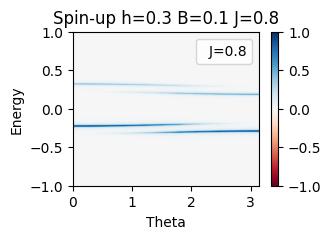

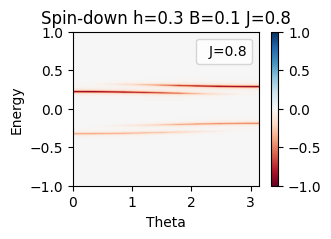

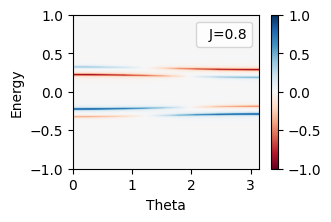

In [55]:
fig = plt.figure(figsize=(3,2))
plot = plt.imshow(norm_spinup.T,aspect='auto',extent=(0,np.pi,-1,1),origin='lower',cmap='RdBu')
plt.plot(0, 0, " ", label = '        J='+str(J))
plt.xlabel('Theta')
plt.ylabel('Energy')
plt.title('Spin-up h='+str(h)+' B='+str(B)+' J='+str(J))
plot.set_clim(vmin = -1.,vmax = 1.)
plt.legend(handletextpad=-2.0, handlelength=0)
plt.colorbar()
#plt.savefig('DOS_spin_up_h'+str(h)+'_B_'+str(B)+' J='+str(J)+'.pdf')
#plt.text(1.9, 0.85, 'h='+str(h)+' B='+str(B)+' J='+str(J), bbox={'facecolor': 'white', 'pad': 10})
plt.show()  

fig = plt.figure(figsize=(3,2))
plot = plt.imshow(-norm_spindown.T,aspect='auto',extent=(0,np.pi,-1,1),origin='lower',cmap='RdBu')
plt.plot(0, 0, " ", label = '        J='+str(J))
plt.xlabel('Theta')
plt.ylabel('Energy')
plot.set_clim(vmin = -1.,vmax = 1.)
plt.legend(handletextpad=-2.0, handlelength=0)
plt.title('Spin-down h='+str(h)+' B='+str(B)+' J='+str(J))
plt.colorbar()
#plt.savefig('DOS_spin_downh'+str(h)+'_B_'+str(B)+' J='+str(J)+'.pdf')
plt.show() 

fig = plt.figure(figsize=(3,2))
plot = plt.imshow((norm_spinup-norm_spindown).T,aspect='auto',extent=(0,np.pi,-1,1),origin='lower',interpolation='bilinear',cmap='RdBu')
plt.plot(0, 0, " ", label = '        J='+str(J))
plt.xlabel('Theta')
plt.ylabel('Energy')
plt.legend(handletextpad=-2.0, handlelength=0)
plot.set_clim(vmin = -1.,vmax = 1.)
plt.colorbar()
#plt.savefig('Total h'+str(h)+'_B_'+str(B)+' J='+str(J)+'.pdf')
plt.show() 